In [1]:
from neo.io import NeuroExplorerIO
import os
import neo
import elephant
import numpy as np
import pandas as pd
import quantities as pq
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
from quantities import ms, s, Hz
from elephant.spike_train_generation import homogeneous_poisson_process, homogeneous_gamma_process
from elephant import neo_tools as nt
from viziphant.rasterplot import rasterplot
from viziphant.spade import plot_patterns
from viziphant.spade import plot_patterns_statistics
import seaborn as sns
import glob

In [2]:
working_directory = r"D:\Files_Reutlingen_Jenny\19-04-16\190416_paper\analysis_01_HCx_GFP_B_aCSF_base"

output_directory = r"D:\Files_Reutlingen_Jenny\19-04-16\190416_paper\analysis_01_HCx_GFP_B_aCSF_base"

In [3]:
os.chdir(working_directory)

In [4]:
filelist = glob.glob('*.npy')
filelist

['01_HCx_GFP_B_aCSF_base_0_to_120_completerecording_full_spikedic.npy',
 '01_HCx_GFP_B_aCSF_base_whole_recording_burst_connections_dic.npy',
 'infodics_01_HCx_GFP_B_aCSF_base_0_to_120_completerecording.npy']

In [5]:
file_spikedic = glob.glob('*spikedic*')[0]
file_infodic = glob.glob('*info*')[0]

In [6]:
spikedic_MAD = np.load(file_spikedic, allow_pickle=True).item()
infodic = np.load(file_infodic, allow_pickle=True).item()

In [10]:
infodic = infodic['0_to_120']

In [11]:
# we gather the general information


tick = infodic['tick']
# the timelength recording must be set to 120 seconds if we observe
timelengthrecording_s = infodic['timelengthrecording_s']
first_recording_timepoint = infodic['first_recording_timepoint']
scale_factor_for_second = infodic['scale_factor_for_second']
scale_factor_for_milisecond = scale_factor_for_second/1000

In [12]:
# function to subdivide a spiketrain
def subdivide_spiketrain(spiketrain, sub_start = 0, sub_stop = 10, tick=40, scale_factor_for_second=1e-06):
    '''
    Excpects: 
        a spiketrain with tick datapoints
        default ticks are 40
        default scale_factor_for_seconds = 1e-06
        provide the start and stop of the desired sub in seconds
    
    Does:
        converts the desired seconds into data ticks
        checks if the spikes of the given spiketrain is in the desired subs
        substracts the starting time -->
        
    Returns:
        a spiketrain dictionary that again starts from zero
    
    '''
    sub_start_tick = sub_start / (tick*scale_factor_for_second)
    sub_stop_tick = sub_stop / (tick*scale_factor_for_second)
    sub_spiketrain = {}
  
    for key in spiketrain: 
        list_per_key = []
        for i in spiketrain[key]:
            if (i>=sub_start_tick ) & (i<sub_stop_tick):
                list_per_key.append(int(i-sub_start_tick))
        sub_spiketrain[key]=list_per_key

    return sub_spiketrain
            

Now that we can define the subpart of the recording we want to observe in SPADE analysis. 


In [13]:
#divide whole spiketrain into subspiketrain
substart = 20
substop = 40 


spade_st = subdivide_spiketrain(spikedic_MAD, sub_start=substart, sub_stop=substop)

In [14]:
spade_st

{'R12': [662,
  9405,
  9902,
  10577,
  17752,
  18272,
  18969,
  35558,
  36078,
  36872,
  44704,
  45211,
  46172,
  54993,
  55493,
  55796,
  56022,
  58204,
  58905,
  68402,
  68878,
  69448,
  71218,
  71789,
  76294,
  76967,
  78238,
  82040,
  82534,
  83152,
  85797,
  86388,
  87188,
  96260,
  96764,
  97912,
  99093,
  101251,
  101662,
  101948,
  102911,
  103538,
  104325,
  112129,
  113167,
  115113,
  115360,
  115783,
  116446,
  116532,
  123570,
  126148,
  128279,
  129045,
  129681,
  129850,
  130523,
  141101,
  141564,
  142219,
  158429,
  159031,
  163006,
  163610,
  164459,
  165777,
  172424,
  172617,
  173185,
  173985,
  174847,
  187290,
  187907,
  188655,
  197774,
  198350,
  199277,
  206864,
  207358,
  208351,
  208966,
  211393,
  216351,
  217383,
  217631,
  217986,
  218488,
  219063,
  220396,
  226754,
  232683,
  258033,
  258553,
  259336,
  269226,
  270164,
  270740,
  272013,
  283315,
  284459,
  285068,
  285761,
  287800,
  29

In [15]:
spiketrain_filename = 'spiketrain_spade_190416_01_HCx_GFP_B_aCSF_'+str(substart)+'_'+str(substop)+'.npy'
np.save(spiketrain_filename, spade_st)

### SPADE ANALYSIS

#### This is performed in  KAGGLE or Saturncloud

In [92]:
spadefile = glob.glob('*spade*SPADE*.npy')

In [93]:
spadefile

['spiketrain_spade_191023_915_925_SPADE_binsize-3_winlen-20_dither-20_spectrum-3d#_statcor-fdr_bh.npy',
 'spiketrain_spade_191023_915_925_SPADE_binsize-5_winlen-20_dither-20_spectrum-3d#_statcor-fdr_bh.npy']

In [97]:
spadefile = glob.glob('*spade*SPADE*.npy')[1]

In [98]:
reloadedspikedic = np.load(spiketrain_filename, allow_pickle='TRUE').item()
spade =  np.load(spadefile,allow_pickle='TRUE').item()

# SPADE RESULTS

In [99]:
len(spade['patterns'])

232

In [100]:
scale_factor_for_second = 1e-06
scale_factor_for_milisecond = 1e-03
tick=40

In [101]:
spikes = []

for key in reloadedspikedic:
    spikes.append(reloadedspikedic[key])
spikearray = np.sort(np.concatenate(spikes, axis = 0))
spikelist = list(spikearray)

spikearray_sec=spikearray*scale_factor_for_second*tick
recordinglength = round(spikearray_sec[-1]) + 1

In [102]:
def spikedic_to_neospiketrains(spikedic, recordinglength):
    
    

    spiketrains = [] 
    keylist_spiketrains = []
    for key in reloadedspikedic:
        key_array=np.asarray(reloadedspikedic[key])
        key_array_sec=key_array*1e-06*tick
        if len(key_array_sec)>2:
            st = neo.SpikeTrain(list(key_array_sec), units='sec', t_stop=recordinglength)
            spiketrains.append(st)
            keylist_spiketrains.append(key)
        
    return spiketrains, keylist_spiketrains

In [103]:
spiketrains, keylist_spiketrains = spikedic_to_neospiketrains(reloadedspikedic, recordinglength)

In [104]:
keylist_spiketrains

['O10',
 'R2',
 'L2',
 'I4',
 'H5',
 'M9',
 'L8',
 'P6',
 'L7',
 'O3',
 'L3',
 'H6',
 'E1',
 'M10',
 'O4',
 'M3',
 'K5',
 'L4',
 'K1',
 'H7',
 'G2',
 'M7',
 'R7',
 'O5',
 'R3',
 'N3',
 'L1',
 'H2',
 'G1',
 'B6',
 'F8',
 'E9',
 'A13',
 'G7',
 'E8',
 'A8',
 'F10',
 'F12',
 'F11',
 'H11',
 'G14',
 'A7',
 'E11',
 'B7',
 'B9',
 'G8',
 'E10',
 'G11']

In [105]:
spiketrains

[SpikeTrain,
 SpikeTrain,
 SpikeTrain,
 SpikeTrain,
 SpikeTrain,
 SpikeTrain,
 SpikeTrain,
 SpikeTrain,
 SpikeTrain,
 SpikeTrain,
 SpikeTrain,
 SpikeTrain,
 SpikeTrain,
 SpikeTrain,
 SpikeTrain,
 SpikeTrain,
 SpikeTrain,
 SpikeTrain,
 SpikeTrain,
 SpikeTrain,
 SpikeTrain,
 SpikeTrain,
 SpikeTrain,
 SpikeTrain,
 SpikeTrain,
 SpikeTrain,
 SpikeTrain,
 SpikeTrain,
 SpikeTrain,
 SpikeTrain,
 SpikeTrain,
 SpikeTrain,
 SpikeTrain,
 SpikeTrain,
 SpikeTrain,
 SpikeTrain,
 SpikeTrain,
 SpikeTrain,
 SpikeTrain,
 SpikeTrain,
 SpikeTrain,
 SpikeTrain,
 SpikeTrain,
 SpikeTrain,
 SpikeTrain,
 SpikeTrain,
 SpikeTrain,
 SpikeTrain]

(<Figure size 720x720 with 4 Axes>,
 array([<AxesSubplot:title={'center':'Patterns statistics'}, xlabel='Neuronal participation in patterns', ylabel='Count'>,
        <AxesSubplot:xlabel='Pattern occurrences', ylabel='Count'>,
        <AxesSubplot:xlabel='Pattern size', ylabel='Count'>,
        <AxesSubplot:xlabel='Lags (ms)', ylabel='Count'>], dtype=object))

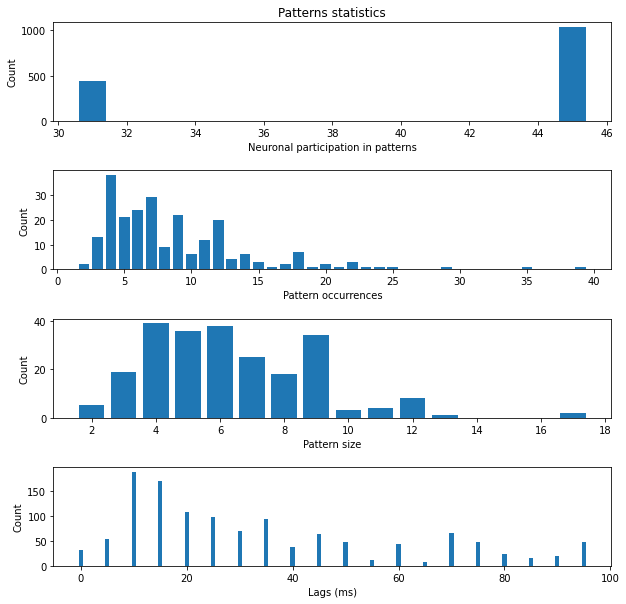

In [106]:
plot_patterns_statistics(spade['patterns'])

In [89]:
patterns = spade['patterns']

<AxesSubplot:xlabel='Time (s)', ylabel='Neuron'>

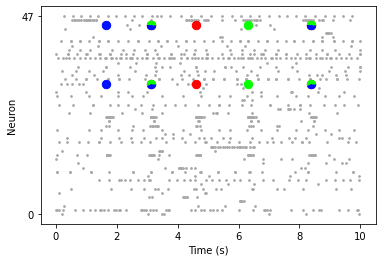

In [112]:
plot_patterns(spiketrains=spiketrains, patterns=patterns[3:6])


In [107]:
type(spikearray_sec)

numpy.ndarray

In [67]:
def make_pattern_dic(patterns):
    
    patterndic = {}
    for i in range(0, len(patterns)):
        key='P'+str(i)
        patterndic[key]=[(patterns[i]['neurons']),(patterns[i]['lags'])]
        
    
    return patterndic

In [68]:
patterndic = make_pattern_dic(patterns)

In [69]:
patterns

[{'itemset': (636,
   627,
   631,
   624,
   919,
   622,
   628,
   630,
   911,
   903,
   914,
   904,
   909,
   901,
   907,
   905,
   900),
  'windows_ids': (623, 1676),
  'neurons': [45,
   45,
   31,
   45,
   31,
   45,
   45,
   31,
   45,
   31,
   45,
   31,
   45,
   31,
   45,
   31,
   45],
  'lags': array([ 5., 10., 15., 20., 20., 25., 35., 35., 40., 45., 50., 55., 55.,
         70., 80., 95.]) * ms,
  'times': array([3115., 8380.]) * ms,
  'signature': (17, 2, 19),
  'pvalue': 0.012},
 {'itemset': (635,
   624,
   630,
   628,
   918,
   622,
   919,
   623,
   903,
   915,
   914,
   902,
   904,
   909,
   907,
   905,
   900),
  'windows_ids': (623, 1262),
  'neurons': [45,
   45,
   31,
   31,
   45,
   31,
   45,
   45,
   45,
   31,
   45,
   31,
   45,
   45,
   31,
   45,
   45],
  'lags': array([10., 10., 15., 15., 20., 20., 25., 35., 40., 45., 50., 70., 75.,
         75., 90., 95.]) * ms,
  'times': array([3115., 6310.]) * ms,
  'signature': (17, 2, 19),
  

In [70]:
def patterns_to_df(df, patterndic, key):
    
    patterncount= (len(patterndic[key][0]))+1
    for i in patterndic[key][0]:
        keystring=keylist_spiketrains[i]
        i, j = keystring[0], int(keystring[1:])
        df.loc[j,i]=patterncount
        df=df.fillna(0)
        patterncount-=1
        
    
    return df

# PATTERNS SPATIAL

In [72]:
def get_channel_SPADE_participation(patterndic, keylist_spiketrains):
    
    '''
    Input: patterndic = Dic with keys=patternnumber, values=array of list, array[0]
            contains the participating channels of that pattern, array[1] contains the lags in between
            
    Output: a dictionary with key: channel names, e.g. A1, value: int given the number of appearances
            in any pattern 
    '''
    
    participation_dic={}
    for key in patterndic:
        for i in patterndic[key][0]:
            pd_key=keylist_spiketrains[i]
            if pd_key in participation_dic:
                participation_dic[pd_key]+=1
            else:
                participation_dic[pd_key]=1
    
    return participation_dic
        
        
    
    
    
    

In [73]:
pd_dic=get_channel_SPADE_participation(patterndic, keylist_spiketrains)

In [74]:
pd_dic

{'G8': 1034, 'E9': 438, 'B7': 1}

In [62]:
participdic['A2']+=1

KeyError: 'A2'

In [63]:
participdic

{'A1': 2}

In [56]:
laglist = []

In [ ]:
for i in patterns:
    i['']

In [67]:
keylist_spiketrains[0]

'N8'

In [56]:
keylist_spiketrains[10]

'D3'

In [203]:
keylist_spiketrains.index('D7')

47

In [74]:
layer2_3list = ['A11', 'A12', 'A13', 'A14', 'A15', 'B12', 'B13', 'B14', 'B15', 'B16', 'C12', 'C13', 'C14', 'C15', 'C16', 'D13', 'D14', 'D15', 'D16', 'E13', 'E14', 'E15', 'E16', 'F13', 'F14', 'F15', 'F16', 'G13', 'G14', 'G15', 'G16', 'H13', 'H14', 'H15', 'H16', 'I13', 'I14', 'I15', 'I16', 'K13', 'K14', 'K15', 'K16', 'L13', 'L14', 'L15', 'L16', 'M13', 'M14', 'M15', 'M16', 'N13', 'N14', 'N15', 'N16', 'O13', 'O14', 'O15', 'O16', 'P12', 'P13', 'P14', 'P15', 'P16', 'R12', 'R13', 'R14', 'R15'] 

In [75]:
layer4_list = ['A10', 'B10', 'B11', 'C11', 'D11', 'D12', 'E11', 'E12', 'F11', 'F12', 'G11', 'G12', 'H11', 'H12', 'I11', 'I12', 'K11', 'K12', 'L11', 'L12', 'M11', 'M12', 'N11', 'O10', 'O11', 'P10', 'P11', 'R10', 'R11'] 

In [76]:
layer5_6list = ['A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'B4', 'B5', 'B6', 'B7', 'B8', 'B9', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9', 'E10', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'F10', 'G4', 'G5', 'G6', 'G7', 'G8', 'G9', 'G10', 'H4', 'H5', 'H6', 'H7', 'H8', 'H9', 'H10', 'I4', 'I5', 'I6', 'I7', 'I8', 'I9', 'I10', 'K4', 'K5', 'K6', 'K7', 'K8', 'K9', 'K10', 'L4', 'L5', 'L6', 'L7', 'L8', 'L9', 'L10', 'M5', 'M6', 'M7', 'M8', 'M9', 'M10', 'N5', 'N6', 'N7', 'N8', 'N9', 'N10', 'O5', 'O6', 'O7', 'O8', 'O9', 'P5', 'P6', 'P7', 'P8', 'P9', 'R5', 'R6', 'R7', 'R8', 'R9']

In [77]:
white_matter_list = ['A2', 'A3', 'B1', 'B2', 'B3', 'C1', 'C2', 'C3', 'D1', 'D2', 'D3', 'E1', 'E2', 'E3', 'F1', 'F2', 'F3', 'G1', 'G2', 'G3', 'H1', 'H2', 'H3', 'I1', 'I2', 'I3', 'K1', 'K2', 'K3', 'L1', 'L2', 'L3', 'M1', 'M2', 'M3', 'M4', 'N1', 'N2', 'N3', 'N4', 'O1', 'O2', 'O3', 'O4', 'P1', 'P2', 'P3', 'P4', 'R2', 'R3', 'R4']

In [83]:
layer4_list.append('O12')

In [ ]:
columnlist =['A','B','C','D','E','F','G','H','I','K','L','M','N','O','P','R']

In [84]:
listdic ={} 

In [90]:
for i in white_matter_list:
    listdic[i]=9

In [167]:
def getlayer_firingrate(fireratedic, layerlist):
    
    sum_all = 0
    n=0
    std=0
    mean=0
    frlist = []
    for i in layerlist:
        sum_all +=fireratedic[i]
        frlist.append(fireratedic[i])
        n+=1
    mean = sum_all/n
    mean_nump=np.mean(frlist)
    std=np.std(frlist)
    
    return mean, mean_nump, std

In [180]:
mean, mean_nump, std = getlayer_firingrate(fireratedic, white_matter_list)

In [181]:
mean

1.0565978155038407

In [182]:
mean_nump

1.0565978155038405

In [183]:
std

2.1159404219949005